In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
import pickle

In [98]:
df = pd.read_csv('used_car_price_dataset_extended.csv')
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


#### Data Cleaning and EDA

In [101]:
# Missing Values
df.isnull().sum()

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

##### Observation
service_history columns shows 2038 columns as null values. But it is not actually null. They are mentioned as None indicating that It has no service history.

In [103]:
df['service_history'].unique()

array([nan, 'Full', 'Partial'], dtype=object)

In [104]:
# Filling the Nan values with the string None
df['service_history'] = df['service_history'].fillna('None')

In [105]:
# Encoding the service_history column
df['service_history'] = df['service_history'].map({
    'None': 0,
    'Full': 2,
    'Partial': 1
})

In [106]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,0,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,0,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,2,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,2,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,2,0,Yes


In [107]:
df.isnull().sum()

make_year             0
mileage_kmpl          0
engine_cc             0
fuel_type             0
owner_count           0
price_usd             0
brand                 0
transmission          0
color                 0
service_history       0
accidents_reported    0
insurance_valid       0
dtype: int64

In [108]:
df['service_history'].value_counts()

service_history
2    4987
1    2975
0    2038
Name: count, dtype: int64

In [109]:
# Removing unnecessary columns
df.drop('color', axis=1, inplace=True)

In [110]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,0,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,0,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,2,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,2,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,2,0,Yes


In [111]:
# Encoding the other categorical columns
df['transmission'].value_counts()

transmission
Manual       5985
Automatic    4015
Name: count, dtype: int64

In [112]:
df['transmission'] = np.where(df['transmission'].str.contains('Manual'), 0, 1)

In [113]:
df['insurance_valid'].value_counts()

insurance_valid
Yes    7934
No     2066
Name: count, dtype: int64

In [114]:
df['insurance_valid'] = np.where(df['insurance_valid'].str.contains('No'), 0, 1)

In [115]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,0,0,0,0
1,2014,17.59,1500,Petrol,4,5943.50,Honda,0,0,0,1
2,2023,18.09,2500,Diesel,5,9273.58,BMW,1,2,1,1
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,0,2,0,1
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,1,2,0,1


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  int32  
 8   service_history     10000 non-null  int64  
 9   accidents_reported  10000 non-null  int64  
 10  insurance_valid     10000 non-null  int32  
dtypes: float64(2), int32(2), int64(5), object(2)
memory usage: 781.4+ KB


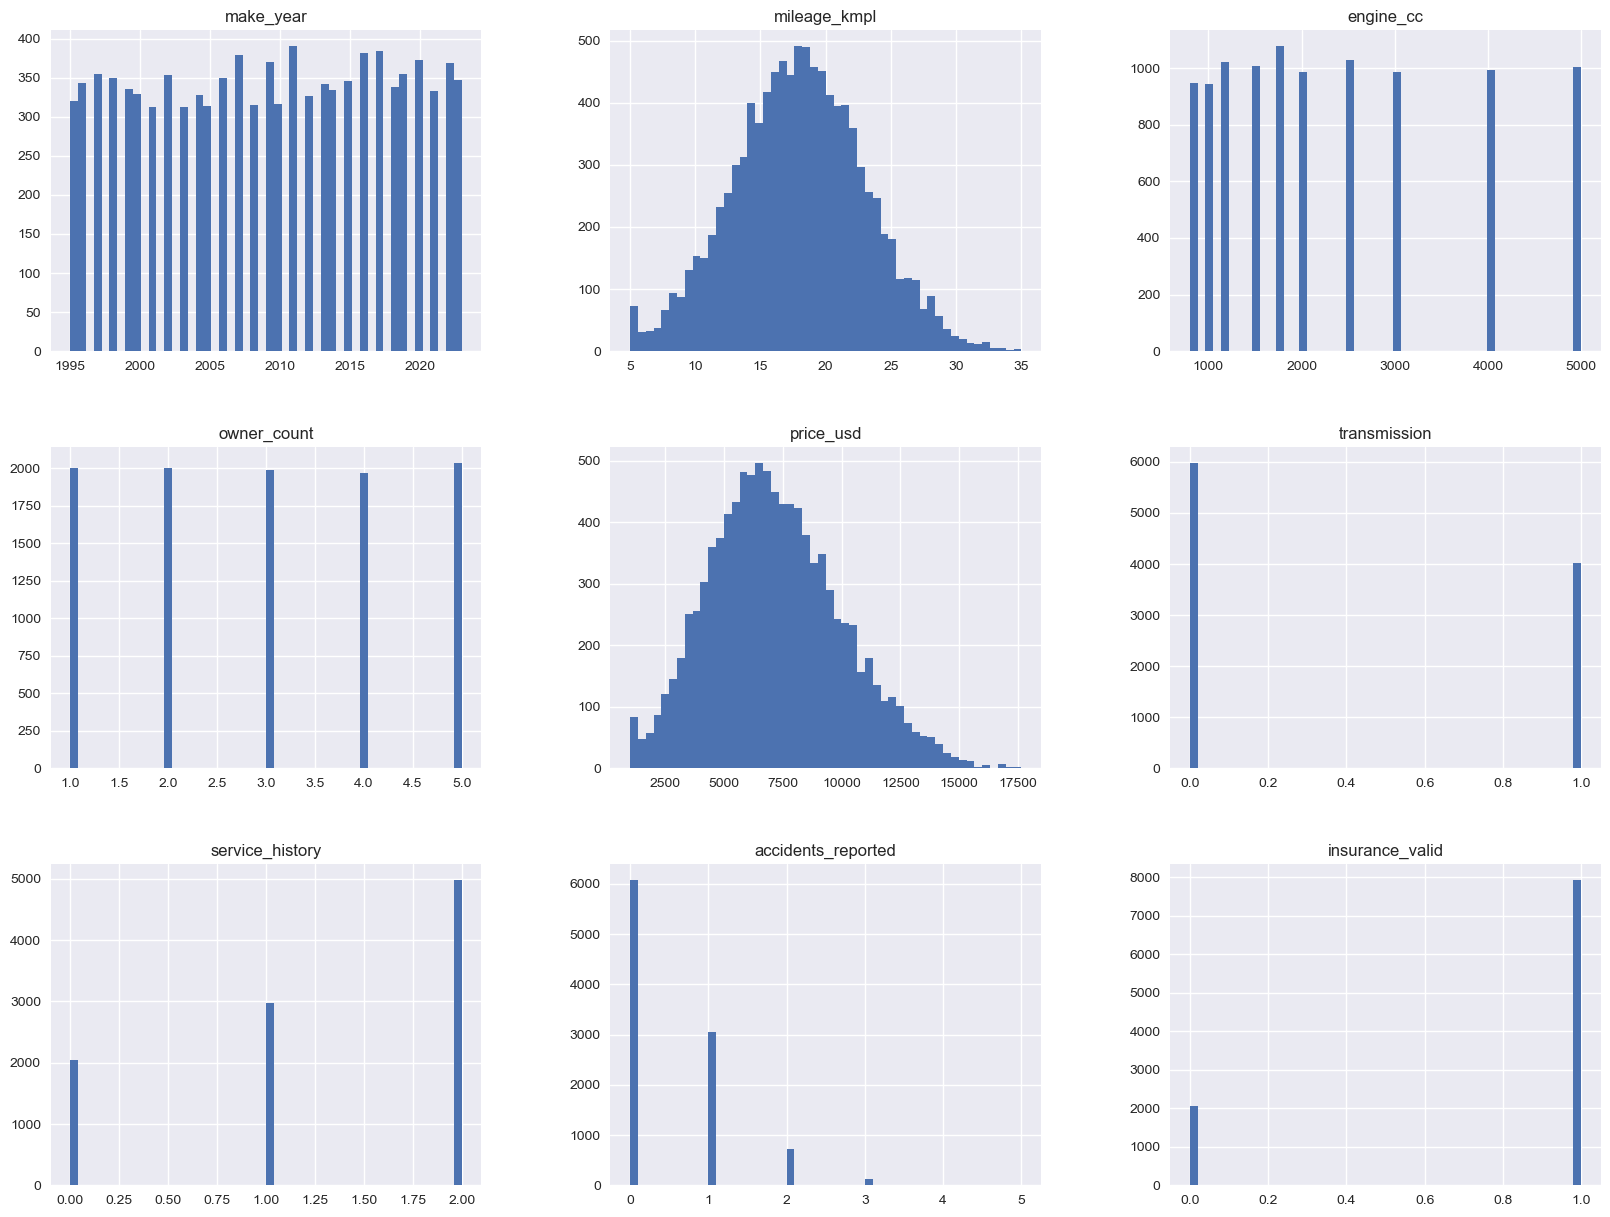

In [136]:
# Plot density for all features
plt.style.use('seaborn-v0_8')
df.hist(bins=50, figsize=(20, 15))
plt.show()

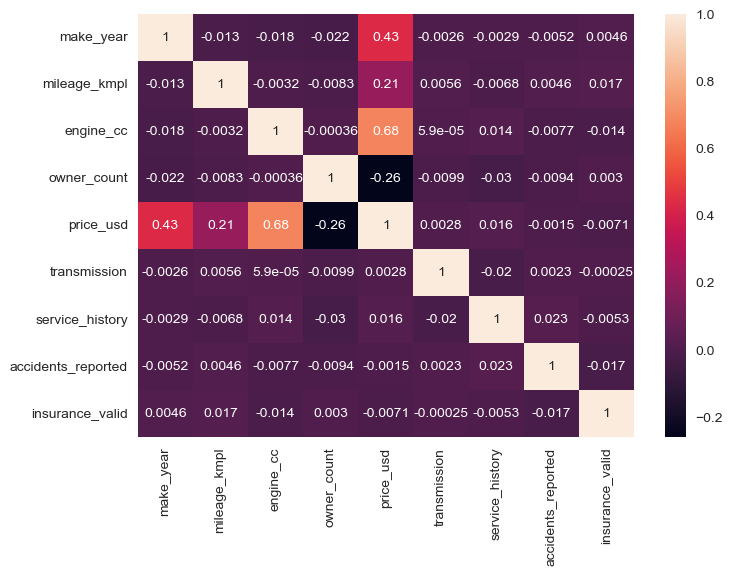

In [142]:
# Correlation
df_copy = df.drop(['brand', 'fuel_type'], axis=1)
correlation = df_copy.corr()
sns.heatmap(correlation, annot=True)
plt.show()

#### Model Training

In [149]:
X = df.drop('price_usd', axis=1)
y = df['price_usd']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
# OneHotEncoding for the categorical featuers and StandardScaler for numeric features
categorical_features = ['fuel_type', 'brand']
numeric_features = [column for column in X.columns if column not in categorical_features]
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'
)

In [177]:
# Creating a pipeline
def regression(degree):
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linreg', LinearRegression())
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Model Performance
    mean_abs_error = mae(y_test, y_pred)
    mean_sq_error = mse(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Absolute Error: ", mean_abs_error)
    print("Mean Squared Error: ", mean_sq_error)
    print("R2 Score: ", r2)

    # Plot
    plt.scatter(y_test, y_pred)
    plt.show()

Mean Absolute Error:  790.6519130459865
Mean Squared Error:  979740.9767838414
R2 Score:  0.8768476861134356


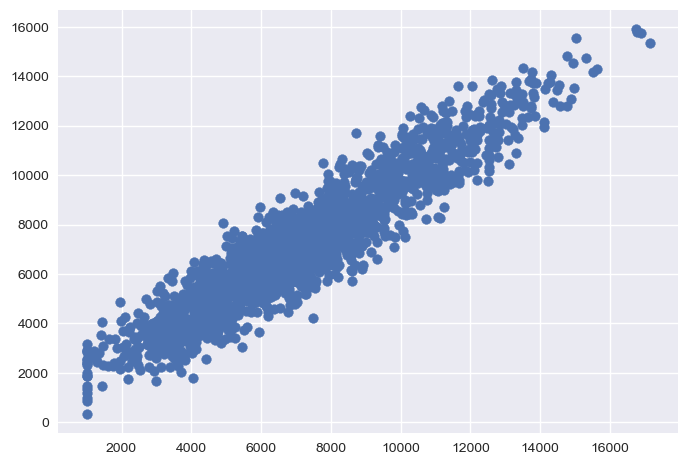

In [179]:
# Degree 1
regression(degree=1)

Mean Absolute Error:  800.3561325000001
Mean Squared Error:  1006067.6616234281
R2 Score:  0.8735384521099743


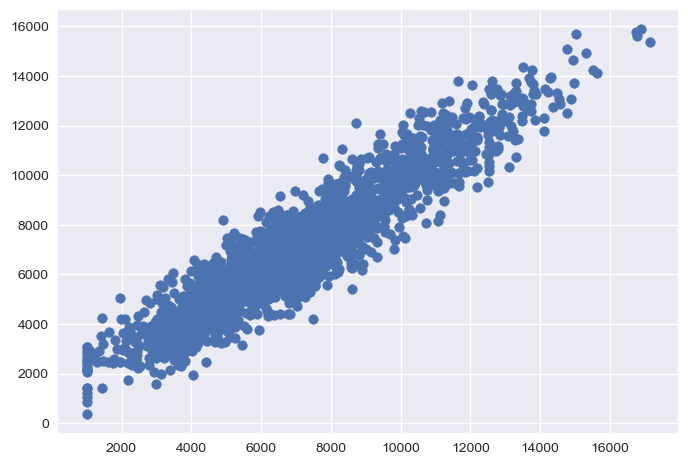

In [183]:
# Degree 2
regression(degree=2)

Mean Absolute Error:  845.44012796875
Mean Squared Error:  1111329.8493047843
R2 Score:  0.8603071161906838


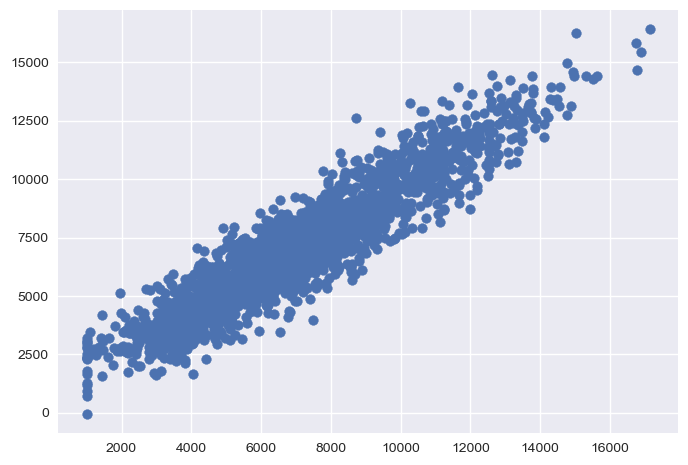

In [185]:
# Degree 3
regression(degree=3)

#### Hyperparameter Tuning

Mean Absolute Error:  790.681275498424
Mean Squared Error:  979780.207719614
R2 Score:  0.8768427548299322


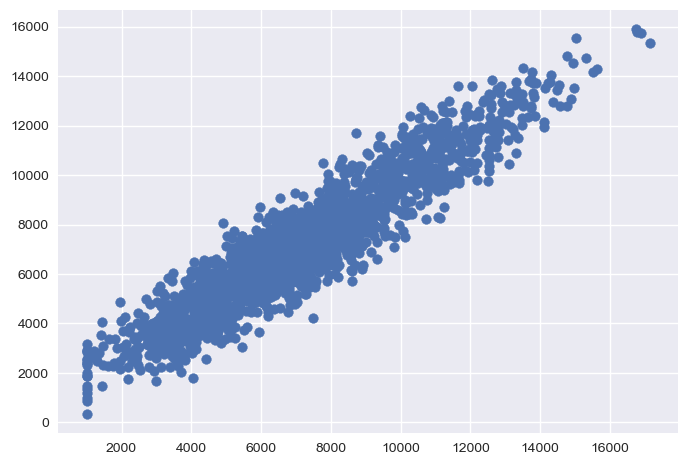

In [203]:
# Creating a RidgeCV pipeline
ridge_model = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=1, include_bias=False)),
    ('regressor', RidgeCV(cv=5))
])

ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

# Model Performance
mean_abs_error = mae(y_test, y_pred)
mean_sq_error = mse(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mean_abs_error)
print("Mean Squared Error: ", mean_sq_error)
print("R2 Score: ", r2)

# Plot
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  791.7925031429121
Mean Squared Error:  981993.9081740396
R2 Score:  0.8765644952290027


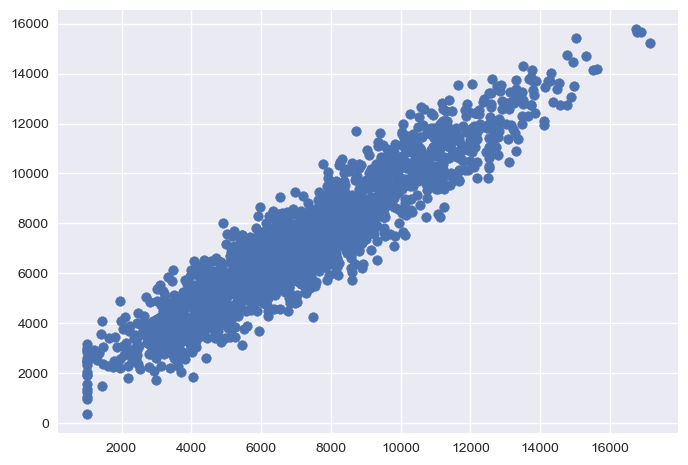

In [205]:
# Creating a LassoCV pipeline
lasso_model = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=1, include_bias=False)),
    ('regressor', LassoCV(cv=5))
])

lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

# Model Performance
mean_abs_error = mae(y_test, y_pred)
mean_sq_error = mse(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mean_abs_error)
print("Mean Squared Error: ", mean_sq_error)
print("R2 Score: ", r2)

# Plot
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  1674.395492498033
Mean Squared Error:  4380475.641129781
R2 Score:  0.4493792503200714


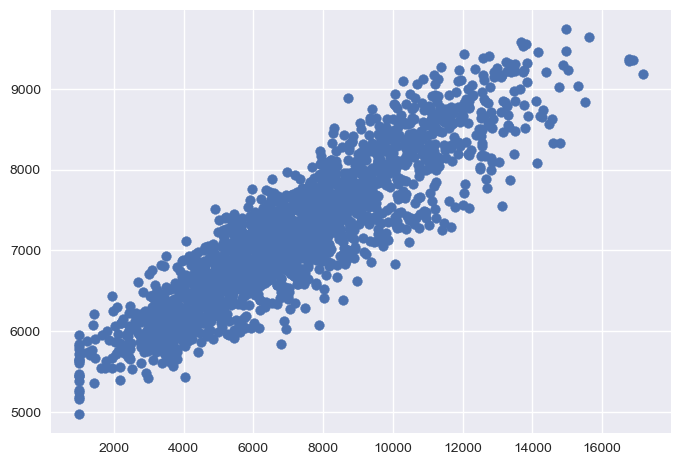

In [199]:
# Creating a ElasticNet pipeline
elastic_model = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=1, include_bias=False)),
    ('regressor', ElasticNetCV(cv=5))
])

elastic_model.fit(X_train, y_train)
y_pred = elastic_model.predict(X_test)

# Model Performance
mean_abs_error = mae(y_test, y_pred)
mean_sq_error = mse(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mean_abs_error)
print("Mean Squared Error: ", mean_sq_error)
print("R2 Score: ", r2)

# Plot
plt.scatter(y_test, y_pred)
plt.show()

Comparing the 3 models, RidgeCV gives the better performance.

#### Pickling

In [210]:
pickle.dump(ridge_model, open('ridge_model.pkl', 'wb'))